# 16. Regularization

--------------------
### 목차
2. Regularization과 Normalization
3. L1 Regularization
4. L2 Regularization
5. Extra : Lp norm
6. Dropout
7. Batch Normalization

### 학습 목표
* 정칙화(Regularization)의 개념을 이해하고 정규화(Normalization)와 구분합니다.
* L1 regularization과 L2 regularization의 차이를 설명합니다.
* 실습을 통하여 Lp norm, Dropout, Batch Normalization에 대해 학습합니다.

-------------------

## 16-2. Regularization과 Normalization

### Regularization
* **정칙화**라고 불리며, **오버피팅(Overfitting)**을 해결하기 위한 방법 중 하나이다.
* 위 오버피팅을 해결하기 위한 방법은 **L1, L2 Regularization, Dropout, Batch nomalization**이 있다.

* 오버피팅은 학습한 데이터에 과도하게 맞추어진 학습이다. 

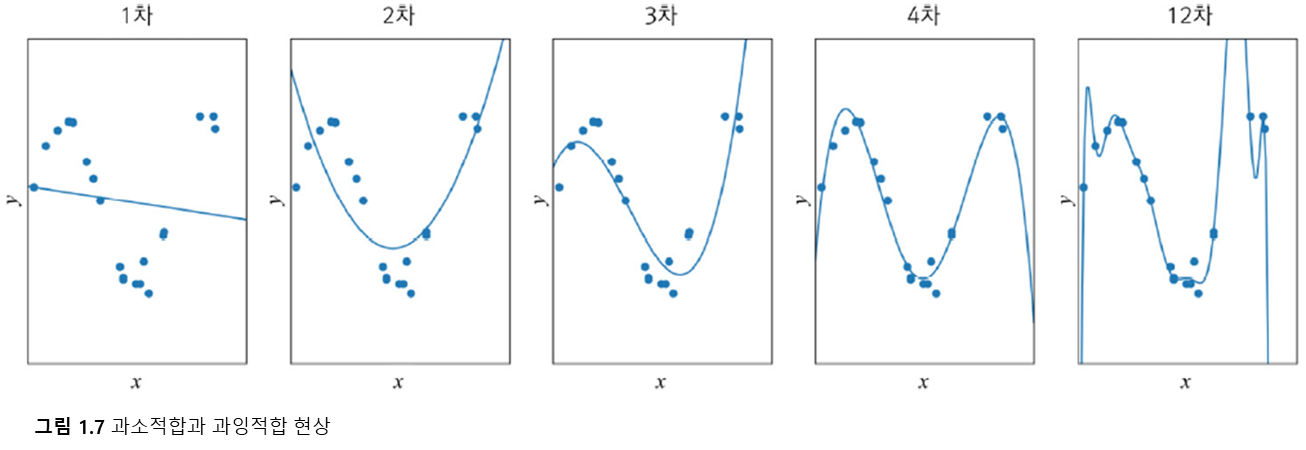

* 12차에 경우 주어진 점들을 거의 다 거치는 선을 만들어 냈지만 새로운 점이 주어지면 오차가 커질 것이다. 

### Normalization(정규화)
* 데이터를 z-score로 바꾸거나 minmax scaler를 사용하여 0과 1사이의 값으로 분포를 조정하는 것들이 해당된다.
* 즉, 모델이 풀어야 하는 문제를 좀 더 간단하게 바꾸어 주는 전처리 과정이다.



In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


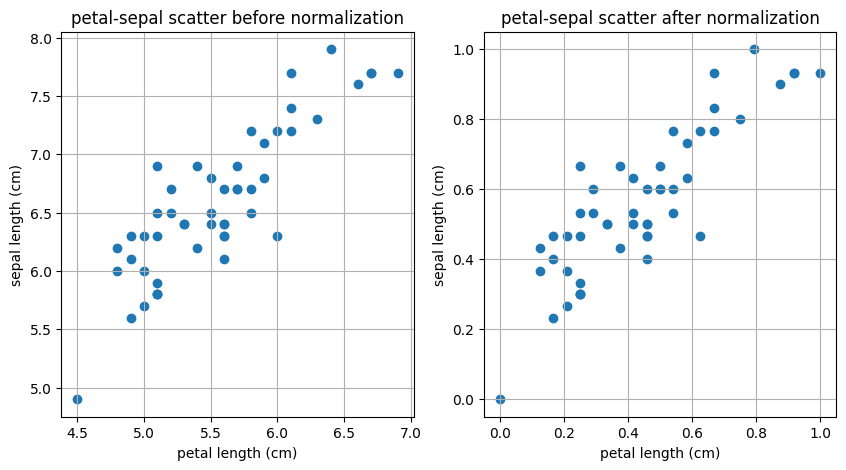

In [8]:
from sklearn.preprocessing import minmax_scale

X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 1.00, 절편 : 1.06


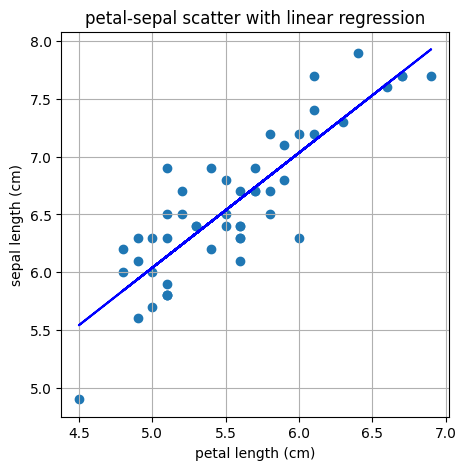

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

## L1 
# L1 = Lasso(alpha=0.05)
# L1.fit(X.reshape(-1,1), Y)

## L2
# L2 = Ridge()
# L2.fit(X.reshape(-1,1),Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
# a, b = L1.coef_,L1.intercept_
# a, b = L2.coef_, L2.intercept_

print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
# plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
# plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

## 16-3. L1 Regularization.

* L1 규제는 다음과 같은 식으로 정의된다.
$$
\hat{\beta}^{\text{lasso}}:= \text{argmin}_\beta \frac{1}{2N} \sum_{i=1}^{N}(y_i-\beta_0-\sum_{j=1}^{D}x_{ij}\beta_j)^2+\lambda\sum_{j=1}^D |\beta_j|
$$
* 위 식에서 $\lambda\sum_{j=1}^D |\beta_j|$이 가장 중요하다.

* Lp norm에서 $p=1$인 경우인 L1 norm은 $||x||_1=\sum^n_{i=1}|x_i|$로 나타난다.

* 이를 사이킷런, 케라스, 텐서플로우에서는 `Lasso` 라고 쓰인다.


## 16-4. L2 Regularization

* L2 규제는 다음과 같은 식으로 정의된다.
$$
\hat{\beta}^{\text{lasso}}:= \text{argmin}_\beta \frac{1}{2N} \sum_{i=1}^{N}(y_i-\beta_0-\sum_{j=1}^{D}x_{ij}\beta_j)^2+\lambda\sum_{j=1}^D \beta_j^2
$$

* L1 norm은 $|w_1|+|w_2|$를 최소화 하는 것이 목적이라면 L2 norm은 $w_1^2+w_2^2$을 최소화 한다. 이를 떠오르는 이미지로 생각해 본다면 둘의 차이점을 알수 있을 것이다.

## 실습 

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

# Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid),verbose=False)

In [ ]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.subplot(2,1,1)
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.subplot(2,1,2)
plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# Q. dropout layer를 추가해보세요. (dropout 확률은 0.5로 지정해주세요.)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

In [ ]:
# Q. loss 값의 그래프를 그려봅시다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Q. accuracy 값의 그래프를 그려봅시다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()